<a href="https://colab.research.google.com/github/Rahulverma2045/NETFLIX-_MOVIES_AND_TV_SHOWS_CLUSTRING/blob/main/Copy_of_Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING



# **Project Type**    - Unsupervised
# **Contribution**    - Team
# **Team Member 1 -**RAHUL VERMA
# **Team Member 2 -**SUMIT SHARMA
# **Team Member 3 -**KHUSHBOO KHANRAH
# **Team Member 4 -**VISHAL TOMAR

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


# This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

#In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

#Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# *In this project, you are required to do



#Exploratory Data Analysis

#Understanding what type content is available in different countries

#Is Netflix has increasingly focusing on TV rather than movies in recent years.

# Clustering similar content by matching text-based features

# **Attribute Information**


#show_id : Unique ID for every Movie / Tv Show

#type : Identifier - A Movie or TV Show

#title : Title of the Movie / Tv Show

#director : Director of the Movie

#cast : Actors involved in the movie / show

#country : Country where the movie / show was produced

#date_added : Date it was added on Netflix

#release_year : Actual Releaseyear of the movie / show

#rating : TV Rating of the movie / show

#duration : Total Duration - in minutes or number of seasons

#listed_in : Genere

#description: The Summary description

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import AffinityPropagation

from sklearn.decomposition import PCA


from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
import nltk 


# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

### Dataset Loading

In [ ]:
# mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [110]:
# Dataset First Look
df =  pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset Rows & Columns count

In [50]:
# head of the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [51]:
#tail of the dataset
df.tail()
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Information

In [ ]:
# Dataset  basic Info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# describing the dataset
df.describe(include = ['category', 'object']).transpose()

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [ ]:
# Droping the show_id column
df = df.drop(['show_id'], axis =1)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# checking missing values
df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

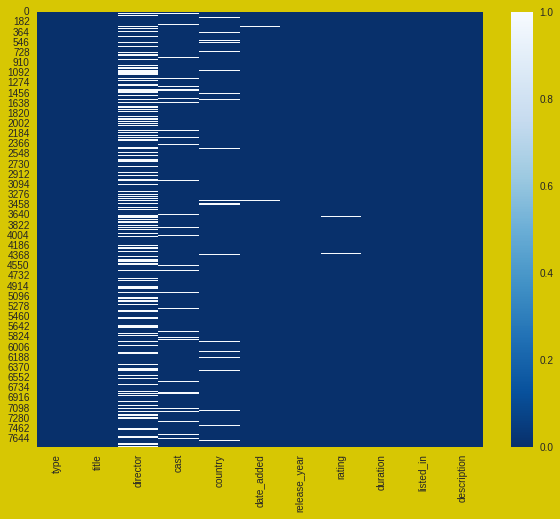

In [ ]:
# Visualizing the missing values
plt.figure(figsize = (10,8), facecolor = 'y')
ax = plt.gca()
sns.heatmap(df.isnull(), cmap = 'Blues_r', ax =ax,  linecolor = 'r')
plt.show()

In [ ]:
# filling the missing values in director, cast and country column
df['director'] =df.director.fillna('None')
df['cast'] =  df['cast'].fillna('not available')
df['country'] = df['country'].fillna('missing')
     

In [ ]:

# checking for the missing values after imputing values in above columns
df.isnull().sum()
     

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [ ]:
df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [ ]:
df.dropna(axis = 0, inplace = True)
df.shape

(7770, 11)

In [ ]:

# checking the null values after removal
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What did you know about your dataset?

Answer Here

In [ ]:
# dropping date_added and rating rows where values are missing
df = df.dropna(axis =0, subset = ['date_added', 'rating'] )
df['date_added'].isnull().sum()

0

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns
     

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7770,7770,7770,7770,7770,7770,7770.000000,7770,7770,7770,7770
unique,2,7770,4048,6818,682,1563,NaN,14,216,491,7752
top,Movie,3%,None,not available,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,5372,1,2376,718,2546,118,NaN,2861,1606,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.935393,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.764357,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

# show_id : Unique ID for every Movie / Tv Show

# type : Identifier - A Movie or TV Show

# title : Title of the Movie / Tv Show

# director : Director of the Movie

# cast : Actors involved in the movie / show

# country : Country where the movie / show was produced

# date_added : Date it was added on Netflix

# release_year : Actual Releaseyear of the movie / show

# rating : TV Rating of the movie / show

# duration : Total Duration - in minutes or number of seasons

# listed_in : Genere

# description : The Summary description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in type is 2
No. of unique values in title is 7770
No. of unique values in director is 4048
No. of unique values in cast is 6818
No. of unique values in country is 682
No. of unique values in date_added is 1563
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 491
No. of unique values in description is 7752


## 3. ***Data Wrangling***

### Data Wrangling Code

In [111]:
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [112]:
print('Missing Data Percentage')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)/len(df)*100,2))

Missing Data Percentage
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


In [113]:
df[['director']] = df[['director']].fillna('Unknown')
df[['cast']]     = df[['cast']].fillna('Unknown')
df[['country'] ] = df[['country']].fillna('Unknown')

In [114]:
df.dropna(subset=['date_added'], inplace=True)

In [115]:
df.shape

(7777, 12)

In [116]:
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)

In [117]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [118]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [119]:
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [120]:
#Convert timestamp to datetime format to fetch the other details
df["date_added"] = pd.to_datetime(df['date_added'])

In [121]:
#addding new column to dataframe such as 'month_added'and 'year_added' to gain more insights from the data 
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
     

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [122]:
# defining a function to get the year addedfrom the date_added
def func_1(x):
  return x.split()[0]

In [123]:
# Define a function to extract the month from a date string
def func_1(date_str):
    try:
        return datetime.strptime(date_str, '%B %d, %Y').month
    except:
        return None

# Apply the function to the 'date_added' column to get the month added column
df['month_added'] = df['date_added'].apply(func_1)

# Extract the year from the 'date_added' column to get the year added column
df['year_added'] = df['date_added'].apply(lambda x: x.split()[-1] if isinstance(x, str) else None)

# Convert the release year column to a string
df['release_year'] = df['release_year'].astype(str)

# Drop the original 'date_added' column
df = df.drop('date_added', axis=1)


In [124]:
# checking the head of the dataset
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,None,None
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,None,None
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",None,None
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",None,None
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,None,None


In [125]:
# defining two sub-datasets based on type of the content
shows_df = df[df['type'] == 'TV Show']
movie_df  = df[df['type']== 'Movie']


In [126]:
# creating a column n movie_df dataframe using func_1 funtion
movie_df['duration'] = movie_df['duration'].apply(func_1)

In [127]:
# head of movie_data
movie_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,None,Dramas,After a devastating earthquake hits Mexico Cit...,None,None
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,None,Horror Movies,"When an army recruit is found dead, his fellow...",None,None
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,None,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",None,None
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,None,Dramas,A brilliant group of students become card-coun...,None,None
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,None,Horror Movies,"After an awful accident, a couple admitted to ...",None,None


#### Chart - 1

# **Type distribution**

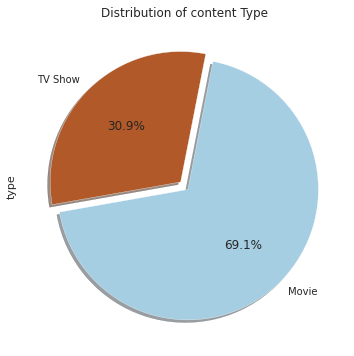

In [97]:
# Chart - 1 visualization code
# plotting the type distribution
sns.set_style('darkgrid')


plt.figure(figsize = (8,6))
df['type'].value_counts().plot.pie(autopct="%1.1f%%", cmap = 'Paired', shadow=True, startangle=190,explode=(0.04,0.04));
plt.title('Distribution of content Type')
plt.show()


In [98]:
# getting top 15 countries based on content type


# creating a  TV shows dataset where imputed values are not taking into account
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_df = tv_shows_df[tv_shows_df['country'] != 'missing']

# creating a  movies dataset where imputed values are not taking into account
movies_df  = df[df['type']== 'Movie']
movies_df = movies_df[movies_df['country'] != 'missing']


# getting unique values shows dataframe
country_df_shows = pd.DataFrame(tv_shows_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_shows.rename(columns = {'index': 'country', 0:'shows counts'}, inplace =True)
top_15_countries = country_df_shows.head(15)

# getting unique values shows dataframe fir movies
country_df_movies = pd.DataFrame(movies_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_movies.rename(columns = {'index': 'country', 0:'movies counts'}, inplace =True)
top_15_countries_movies = country_df_movies.head(15)
new_df = pd.concat([top_15_countries, top_15_countries_movies] , axis =1)

# final dataframe
new_df


,country,shows counts,country,movies counts
0,United States,777,United States,2100
1,Unknown,276,India,883
2,United Kingdom,235,United Kingdom,341
3,Japan,161,Unknown,230
4,South Korea,152,Canada,175
5,Canada,84,France,137
6,India,73,Spain,119
7,Taiwan,70,Egypt,93
8,France,59,Mexico,79
9,Australia,51,Turkey,78


In [99]:
# top 10 directors who have directed most move
director_df  =  df[df['director'] != 'None']
director_df = pd.DataFrame(director_df['director'].value_counts().head(10)).reset_index()
director_df.rename(columns = {'index' : 'director', 'director' : 'counts'}, inplace= True)
director_df



,director,counts
0,Unknown,2379
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Jay Chapman,12
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Steven Spielberg,10
9,David Dhawan,9


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

# **Seasons**

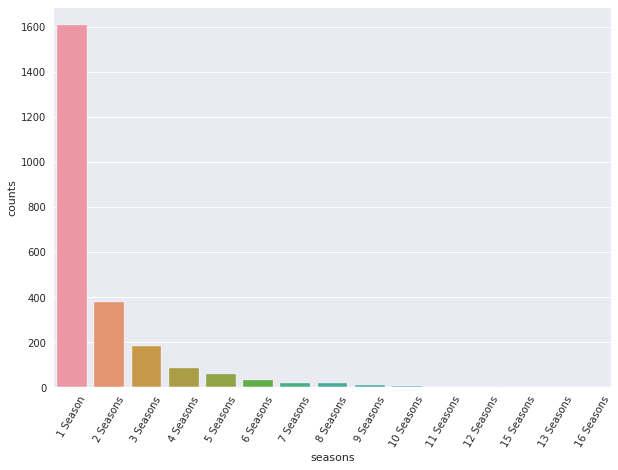

,seasons,counts
0,1 Season,1608
1,2 Seasons,378
2,3 Seasons,183
3,4 Seasons,86
4,5 Seasons,57
5,6 Seasons,30
6,7 Seasons,19
7,8 Seasons,18
8,9 Seasons,8
9,10 Seasons,5


In [100]:
# Chart - 2 visualization code
# plotting seasons distribution for TV shows

plt.figure(figsize = (10,7))


seasons_df = pd.DataFrame(shows_df['duration'].value_counts()).reset_index()
seasons_df.rename(columns = {'index': 'seasons', 'duration': 'counts'}, inplace = True)
sns.barplot(data =seasons_df, x= 'seasons', y= 'counts')
plt.xticks(rotation = 60)
plt.show()


seasons_df

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

# **Duration: ⌛**


In [128]:
# Chart - 3 visualization code
# Create subsets for tv shows and movies.
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

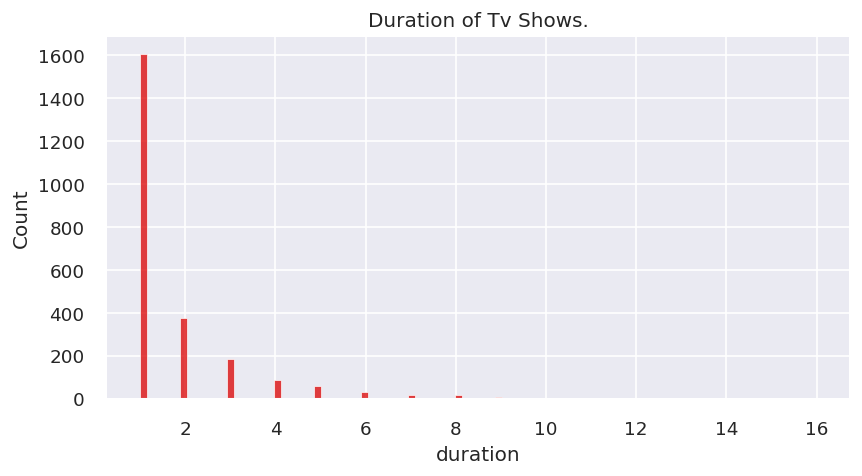

In [102]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()


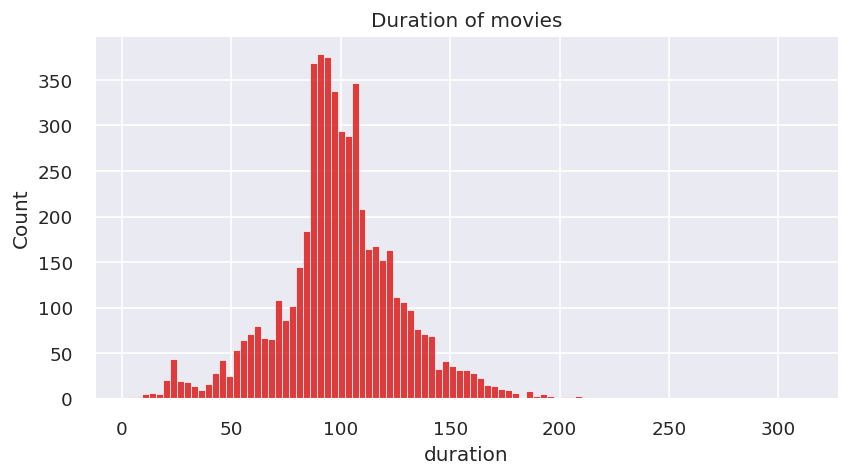

In [105]:

plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

# **Rating: ⭐⭐⭐**

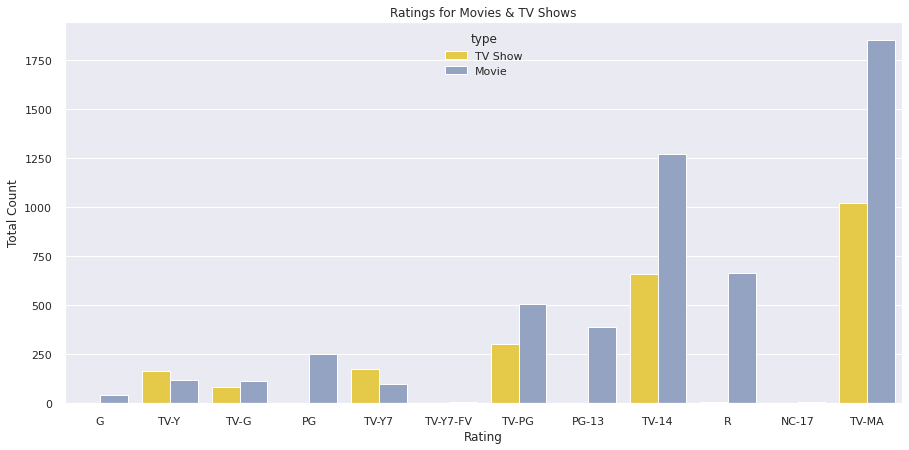

In [129]:
# Chart - 4 visualization code
# visualizing the distribution of various ratings
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(df.rating, hue=df.type, order=order, palette='Set2_r');
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

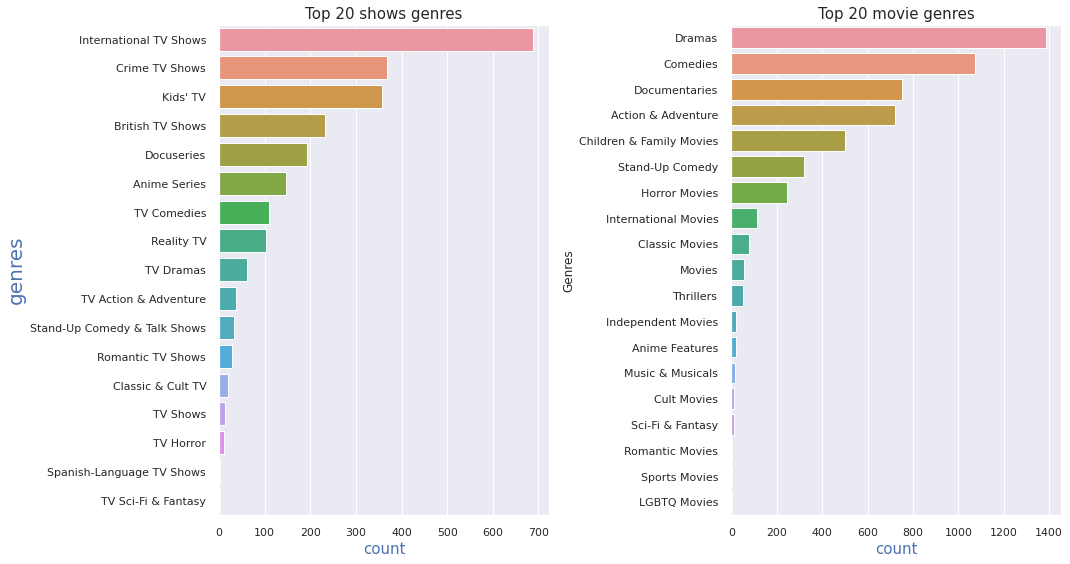

In [130]:
# finding top 20 movie genres in movies and TV shows
genres_shows = shows_df.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_movies = movie_df.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)


fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = genres_shows, order=genres_shows.value_counts().index[:20], ax= axes[0])
sns.countplot(y = genres_movies, order=genres_movies.value_counts().index[:20], ax= axes[1])

axes[0].set_xlabel('count', fontsize = 15, c='b')
axes[1].set_xlabel('count', fontsize = 15, c='b')
axes[0].set_ylabel('genres', fontsize = 20, c = 'b')
axes[0].set_title('Top 20 shows genres', fontsize = 15)
axes[1].set_title('Top 20 movie genres', fontsize = 15 )




# plt.figure(figsize=(7,9))
# g = sns.countplot(y = genres_shows, order=genres_shows.value_counts().index[:20])

# plt.xlabel('Titles')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

# **Actors**

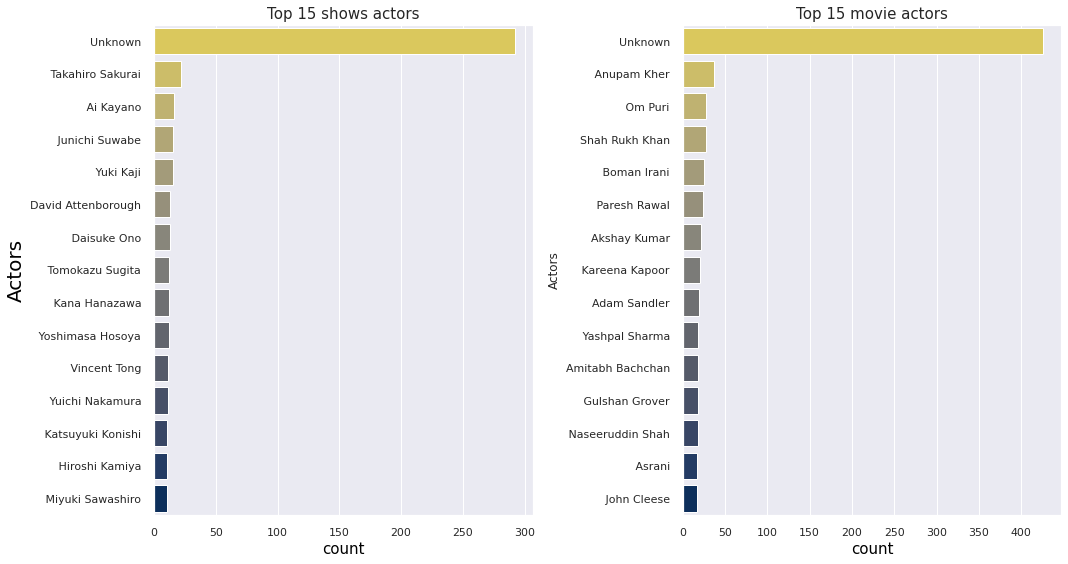

In [131]:
# Chart - 5 visualization code
# finding the top actors who worked in most content in movies and TV shows
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_actors = tv_shows_df[tv_shows_df['cast'] != 'not available']

movies_df  = df[df['type']== 'Movie']
movie_actors = movies_df[movies_df['cast'] != 'not available']




top_shows_actors =  tv_shows_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)
top_movie_actors =  movie_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)



fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = top_shows_actors, order=top_shows_actors.value_counts().index[:15], ax= axes[0], palette ='cividis_r')
sns.countplot(y = top_movie_actors, order=top_movie_actors.value_counts().index[:15], ax= axes[1], palette = 'cividis_r')

axes[0].set_xlabel('count', fontsize = 15, c='black')
axes[1].set_xlabel('count', fontsize = 15, c='black')
axes[0].set_ylabel('Actors', fontsize = 20, c = 'black')
axes[0].set_title('Top 15 shows actors', fontsize = 15)
axes[1].set_title('Top 15 movie actors', fontsize = 15 )

plt.ylabel('Actors')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

# **Most used word in title of content on Netflix**

In [132]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 144890 words in the combination of all titles.


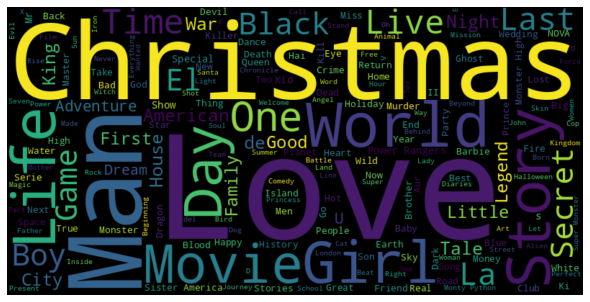

In [133]:
# Chart - 6 visualization code
#chcking word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (14,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

# **Cast: 🎭**

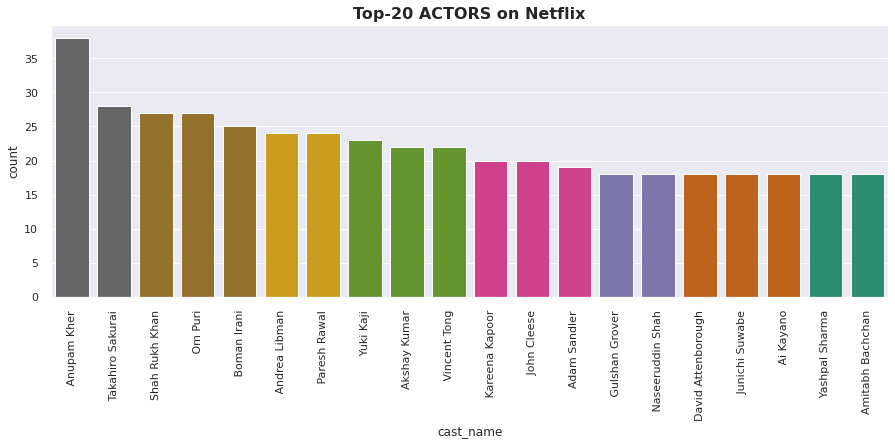

In [134]:
# Chart - 7 visualization code

df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

# **Director: 🤠**

Text(0.5, 1.0, 'Top 10 movie directors')

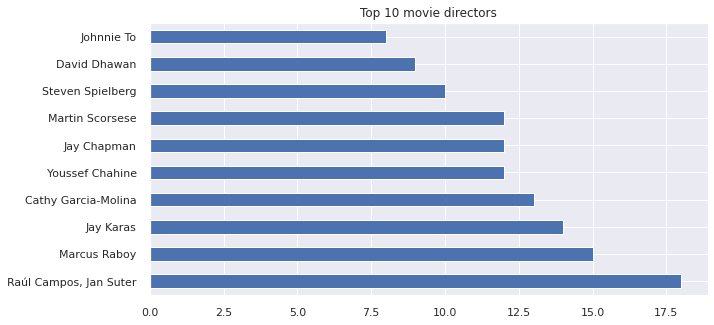

In [135]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

Text(0.5, 1.0, 'Top 10 TV show directors')

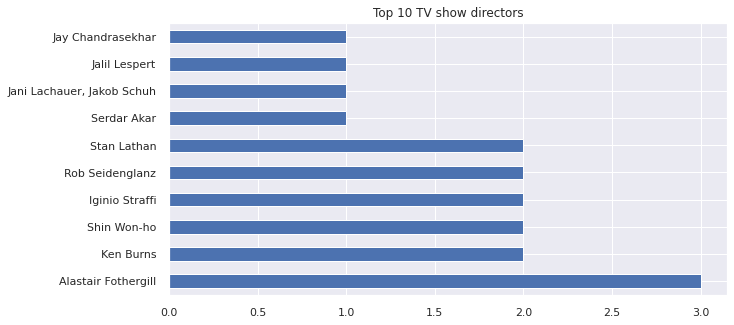

In [136]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

# **Release_year : Actual Releaseyear of the movie / show**


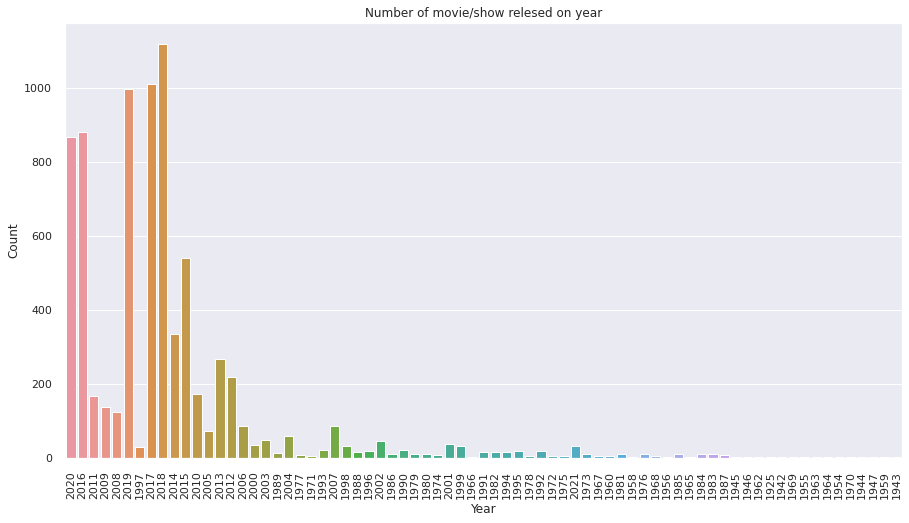

In [137]:
# Chart - 9 visualization code

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="release_year", data=df)
plt.title("Number of movie/show relesed on year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation =90)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

# **country : Country where the movie / show was produced**

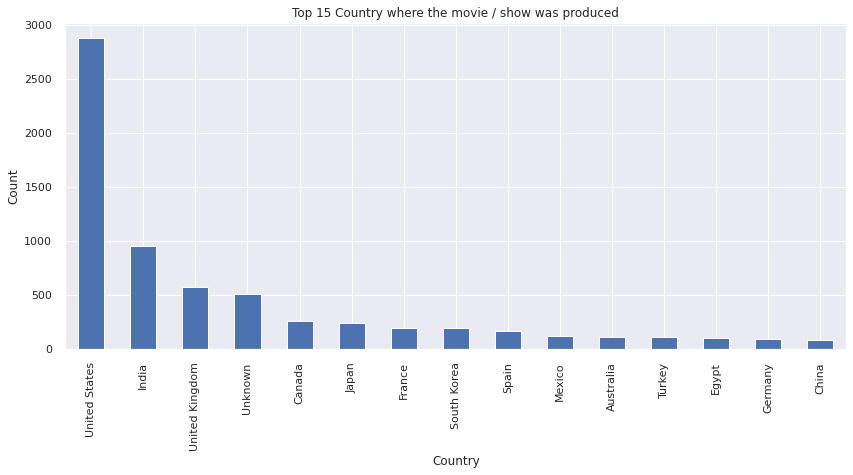

In [138]:
# Chart - 10 visualization code

#top 15 country where the movie/shows was produced
df["country"].value_counts()[:15].sort_values(ascending=False).plot(kind="bar")
plt.title("Top 15 Country where the movie / show was produced")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

# **listed_in : Genere**

Text(0.5, 1.0, 'Top 10 genres')

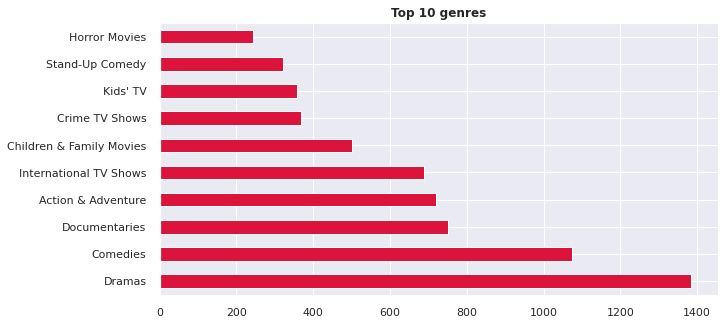

In [139]:
# Chart - 11 visualization code
# TOP 10 GENRES
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh', color= 'crimson')
plt.title('Top 10 genres', fontweight = 'bold')
#sns.countplot(palette = 'cubehelix')

In [140]:
# SHARE TOP 3 GENRES
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [141]:
# SHARE TOP 10 GENRES
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

The dramas is the most popular genre followed by comedies and documentaries.

These three genres account for about 12% of all movies and TV shows.

This value increases to about 29% for top 10 genres.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# **5. Hypothesis Testing**

# 1.HYPOTHESIS TESTING

# HO:movies rated for kids and older kids are at least two hours long.
# H1:movies rated for kids and older kids are not at least two hours long.

In [142]:
movies

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,None,None
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",None,None
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",None,None
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,None,None
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,95 min,Horror Movies,"After an awful accident, a couple admitted to ...",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",None,None
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2005,TV-MA,99 min,Dramas,When Lebanon's Civil War deprives Zozo of his ...,None,None
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,None,None
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,TV-MA,44 min,Documentaries,"In this documentary, South African rapper Nast...",None,None


In [143]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,None,None,"[João Miguel, Bianca Comparato, Michel Gomes..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,None,None,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",None,None,"[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",None,None,"[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,None,None,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."


In [144]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [145]:
#with respect to each ratings assigning it into group of categories                 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages 
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [146]:

#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name,target_ages
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,None,None,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",None,None,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",None,None,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens


In [147]:


#group_by duration and target_ages                 
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group
     

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.230769


In [148]:
#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [149]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [150]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [151]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

# **2. HYPOTHESIS TESTING**
# H1:The duration which is more than 90 mins are movies
# HO:The duration which is more than 90 mins are NOT movies

In [152]:

#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,None,None,"[João Miguel, Bianca Comparato, Michel Gomes..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,None,None,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",None,None,"[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",None,None,"[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,None,None,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."


In [153]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [ ]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

In [154]:
#group_by duration and TYPE                 
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group
     

,type,duration
0,Movie,99.307978
1,TV Show,1.760833


In [155]:
#In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.560603
dtype: float64


In [156]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2400
dof 7775
SP_2 = duration    252.849635
dtype: float64
SP duration    15.901246
dtype: float64
tvalue 249.8923650639716


In [157]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9602691465072455

In [158]:
#t-distribution
stats.t.ppf(0.975,dof)

1.960269146507245

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [159]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director           0
cast               0
country            0
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added      7777
month_added     7777
cast_name          0
dtype: int64


<AxesSubplot:>

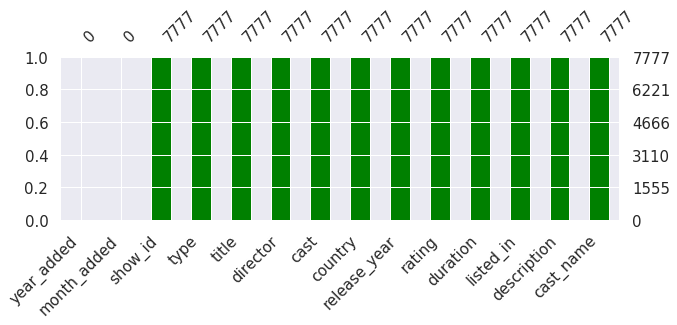

In [160]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

In [161]:
# Missing Values Percentage
round(df.isna().sum()/len(df)*100, 2)

show_id           0.0
type              0.0
title             0.0
director          0.0
cast              0.0
country           0.0
release_year      0.0
rating            0.0
duration          0.0
listed_in         0.0
description       0.0
year_added      100.0
month_added     100.0
cast_name         0.0
dtype: float64

# The "empty string" can be used to replace the missing values in the director, cast, and country attributes.
# There is a small percentage of null values in the rating and date_added columns; eliminating these nan values will have little effect on the model's construction. As a result, the nan value in the rating and date_added columns is simply removed.

In [162]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)
     

In [163]:
# checking for null values after treating them.
df.isna().sum()
     

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
year_added      0.0
month_added     0.0
cast_name       0.0
dtype: float64

### 2. Handling Outliers

<AxesSubplot:>

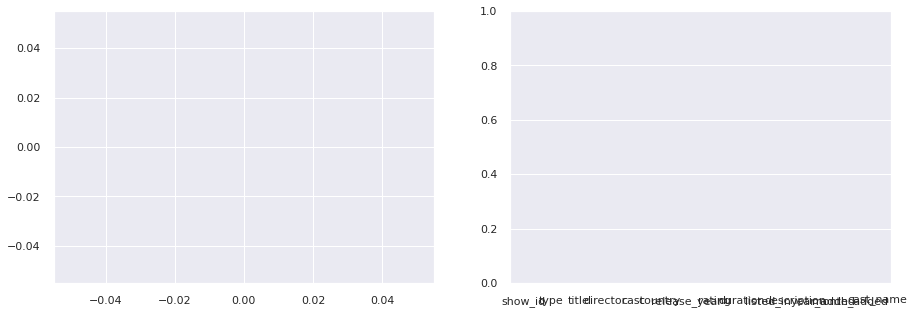

In [165]:

# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(data=df, ax=ax[1])


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.NOT NEEDED

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
df['organized'] =(df['description'].astype(str) + ' ' + 
                  df['listed_in'].astype(str)   + ' ' + 
                  df['rating'].astype(str)      + ' ' + 
                  df['cast'].astype(str)        + ' ' + 
                  df['country'].astype(str)     + ' ' + 
                  df['director'].astype(str))

In [ ]:
df.organized[0]


#### 2. Lower Casing

In [ ]:
# Lower Casing
df['Lower_casing']= df['organized'].str.lower()
     

In [ ]:
df.Lower_casing[0]


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

NOT NEEDED

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

NOT NEEDED

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

NOT NEEDED

### 6. Data Scaling

In [ ]:
# Scaling your data

NOT NEEDED

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

 Answer Here.YES
 As the number of features (words in this case) is high, it is useful to apply dimensionality reduction to simplify the dataset and improve computational efficiency.

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X.toarray())
     

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

NOT NEEDED

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.NOT NEEDED

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
from tabulate import tabulate
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X, y_predict):
    """
    Evaluate a clustering model and print the results.
    & Returns
    Model evaluation result
    """
    # Calculate the number of clusters and evaluation metrics
    n_clusters = len(set(y_predict))
    S_score = silhouette_score(X, y_predict)
    CH_score = calinski_harabasz_score(X, y_predict)
    DB_score = davies_bouldin_score(X, y_predict)
    
    # Print the evaluation results
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette score: {S_score:.4f}")
    print(f"Calinski-Harabasz score: {CH_score:.4f}")
    print(f"Davies-Bouldin score: {DB_score:.4f}")
    
    # Create a dictionary to store the evaluation scores
    scores_dict = {"silhouette_score": S_score,
                   "calinski_harabasz_score": CH_score,
                   "davies_bouldin_score": DB_score}
    
    # Create a dataframe to display the evaluation results
    df_eval = pd.DataFrame({"Evaluation Metric": ["Silhouette Score", 
                                                  "Calinski-Harabasz Score", 
                                                  "Davies-Bouldin Score"],
                                     "Score": [S_score, CH_score, DB_score]})
    
    # Print the dataframe
    print(tabulate(df_eval, headers="keys", tablefmt="grid"))
    
    # Return the evaluation results
    return {"n_clusters": n_clusters,
            "silhouette_score": S_score,
            "calinski_harabasz_score": CH_score,
            "davies_bouldin_score": DB_score}

def plot_clustering_scores(scores_dict):
    """
    Plot the clustering evaluation scores using a bar chart.
    """
    # Extract the scores from the dictionary
    scores = [scores_dict["silhouette_score"], scores_dict["calinski_harabasz_score"], scores_dict["davies_bouldin_score"]]
    labels = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]
    
    # Plot the scores as a bar chart
    fig, ax = plt.subplots()
    ax.bar(labels, scores, color=["tab:blue", "tab:orange", "tab:green"])
    
    # Add labels and titles
    ax.set_xlabel("Evaluation Metric")
    ax.set_ylabel("Score")
    ax.set_title("Clustering Evaluation Scores")
    
    # Set the y-axis limits to the range of the scores
    ax.set_ylim([np.min(scores) - 0.1, np.max(scores) + 0.1])
    
    # Display the plot
    plt.show()
     

# **ML Model - 1 K-Means Clustering**

In [ ]:
# Just guessing and checking by k=3

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(x)

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***